# Figure S7. Properties of genes with multiple causal variants.

- **S7a**. Scatter plot of the change in log-likelihood between primary CoS and a secondary CoS, where each point is a primary-secondary CoS pair for the gene.
- **S7b**. A boxplot summarizing the relationship between the number of colocalized traits and log likelihood changes.
- **S7c**. Functional annotation enrichment comparison between high MaxVCP scored variants (MaxVCP>0.5) in primary CoS versus secondary CoS, including annotations from enhancer, promoter, coding, and repressed categories.
- **S7d**. An example case of xQTL-only colocalization in gene ARSB showing two CoS, one colocalized among all brain cell types and the other colocalized across microglia, astrocytes and oligodendrocytes only. 

## Figure S7a
Scatter plot of the change in log-likelihood between primary CoS and a secondary CoS, where each point is a primary-secondary CoS pair for the gene.

In [6]:
result <- readRDS("Figure_S7a.rds")
dim_max <- max(c(result$primary_loglik, result$secondary_loglik))
p1 <- ggplot(result, aes(x = primary_loglik, y = secondary_loglik)) +
  geom_point(size = 2, color = "grey50") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red", linewidth = 2) +
  coord_fixed(ratio = 1, xlim = c(0, dim_max), ylim = c(0, dim_max)) +
  labs(title = "",
       x = "Change in Log Likelihood\n in Primary CoS",
       y = "Change in Log Likelihood\n in Secondary CoS") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)) 

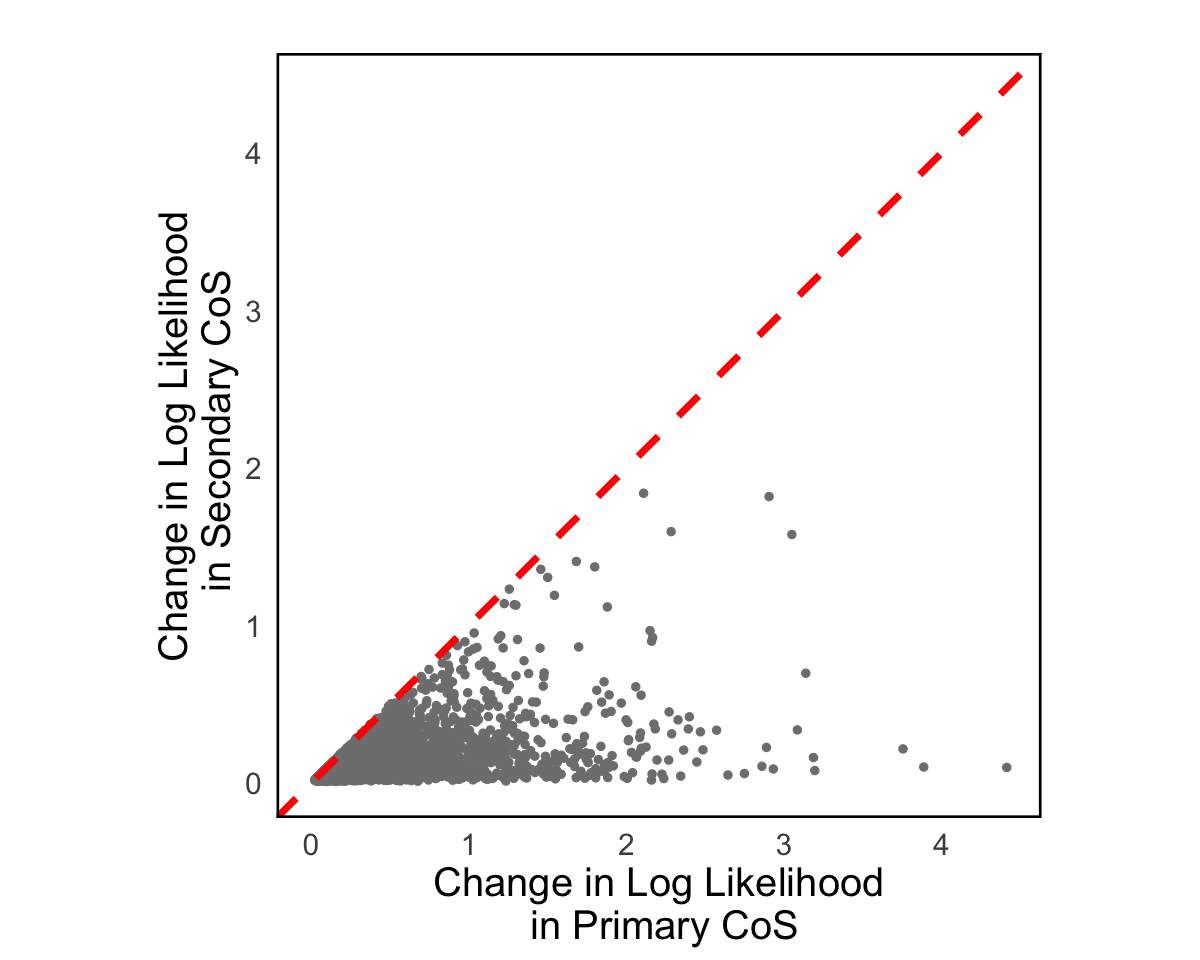

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
p1

## Figure S7b
A boxplot summarizing the relationship between the number of colocalized traits and log likelihood changes.

In [4]:
library(tidyverse)
res = readRDS("../../Main_Figures/Figure_3/data/xQTL_only_colocalization.rds")
coloc_pheno_numbers <- sapply(res$colocalized_phenotypes, function(cp){
  length(strsplit(cp, "; ")[[1]])
})
res <- res %>% mutate(num_phen = coloc_pheno_numbers)
res <- within(res, {
  num_phen <- factor(num_phen, levels = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
})
library(ggsci)
color <- c(pal_npg()(10), pal_d3()(10))
p1 <- ggplot(res, aes(x = num_phen, y = profile_change, fill = num_phen)) +
  geom_boxplot(color = "black") +
  scale_color_manual(values = color) +
  labs(title = "",
       x = "Number of colocalized phenotypes",
       y = "Change in overall log likelihood",
       fill = "") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    legend.position = "",
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) +
  guides(fill = guide_legend(nrow = 1))

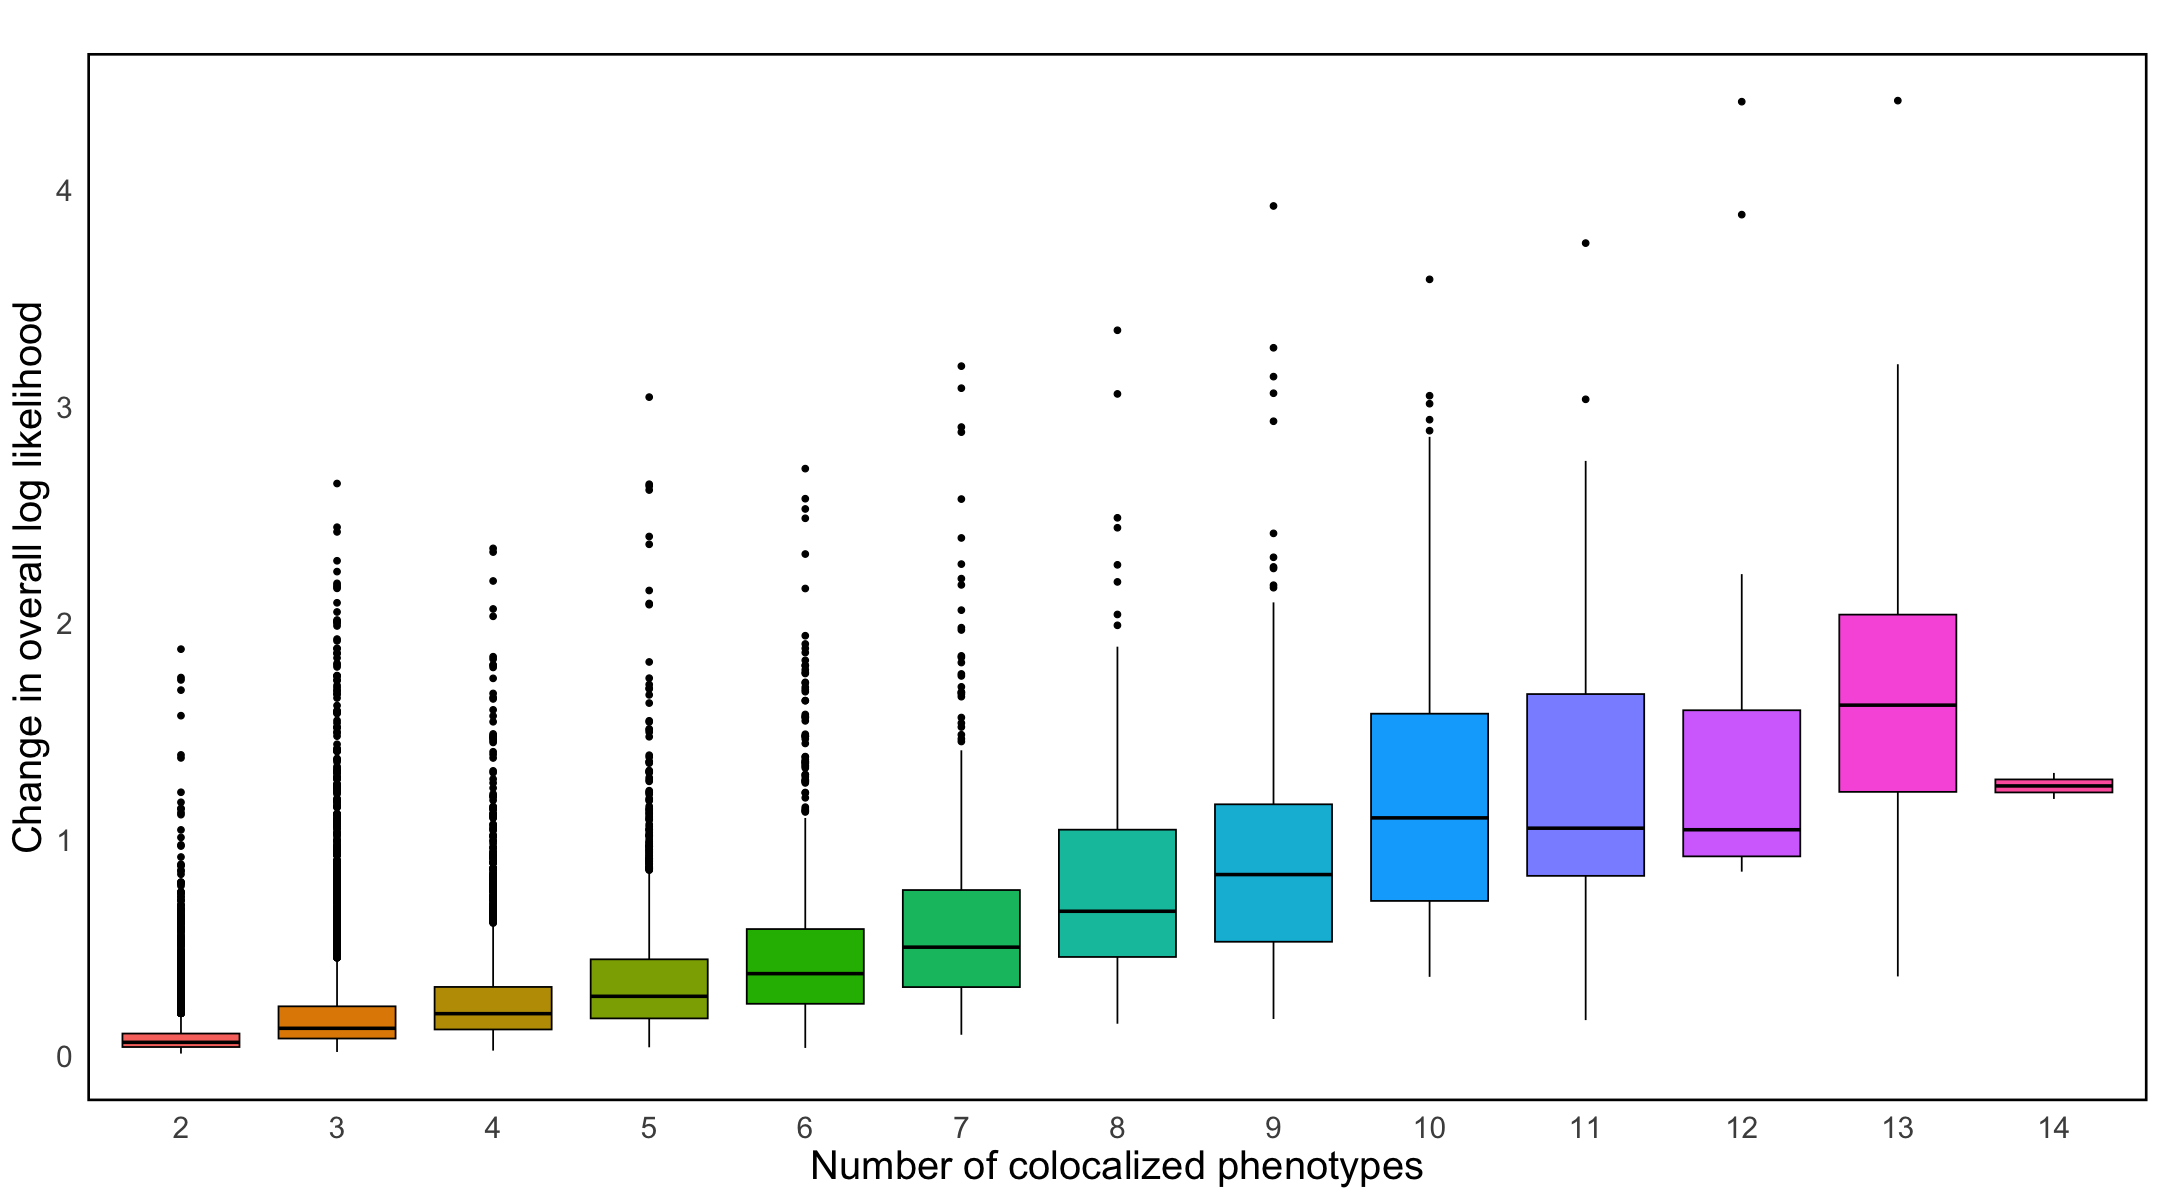

In [5]:
options(repr.plot.width = 18, repr.plot.height = 10)
p1

## Figure S7c
Functional annotation enrichment comparison between high MaxVCP scored variants (MaxVCP>0.5) in primary CoS versus secondary CoS, including annotations from enhancer, promoter, coding, and repressed categories.

In [8]:
library(ggsci)
Enrichment_long = readRDS("Figure_S7c.rds")
p2 <- ggplot(Enrichment_long, aes(x = Enrichment, y = as.numeric(Category) + ifelse(Type == "primary", 0.1, -0.1), color = Type, shape = Type)) +
  geom_point(size = 3) +
  geom_errorbarh(aes(xmin = Enrichment - sd, xmax = Enrichment + sd), height = 0.2) +
  scale_color_manual(values = c("primary" = "#D6604D", "secondary" = "#4393C3")) +
  scale_y_continuous(breaks = 1:4, labels = levels(Enrichment_long$Category), sec.axis = dup_axis()) +
  labs(
    title = "maxVCP >= 0.5",
    x = "Enrichment",
    y = "",
    color = "",
    shape = ""
  ) +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.y.left = element_text(size = 26),
    axis.text.y.right = element_blank(),
    axis.title.x = element_text(size = 26),
    axis.text.x = element_text(size = 22),
    legend.text = element_text(size = 22),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5),
    legend.position = "inside",
    legend.justification = c(0.95, 0.05)
  )  +
  geom_vline(xintercept = 1, linetype = "dashed", linewidth = 1.5)

# Adding short lines and asterisks
for (cat in c("Promoter","Coding")) {
  primary_point <- Enrichment_long[Enrichment_long$Category == cat & Enrichment_long$Type == "primary", ]
  secondary_point <- Enrichment_long[Enrichment_long$Category == cat & Enrichment_long$Type == "secondary", ]
  
  if (nrow(primary_point) == 1 && nrow(secondary_point) == 1) {
    y_primary <- as.numeric(primary_point$Category)
    y_secondary <- as.numeric(secondary_point$Category)
    x_primary <- primary_point$Enrichment
    x_secondary <- secondary_point$Enrichment
    
    p2 <- p2 +
      annotate("segment", x = x_primary, xend = x_secondary, y = y_primary + 0.22, yend = y_primary + 0.22, color = "grey40") +
      annotate("text", x = mean(c(x_primary, x_secondary)), y = y_primary + 0.25, label = "*", size = 7, color = "grey40")
  }
}

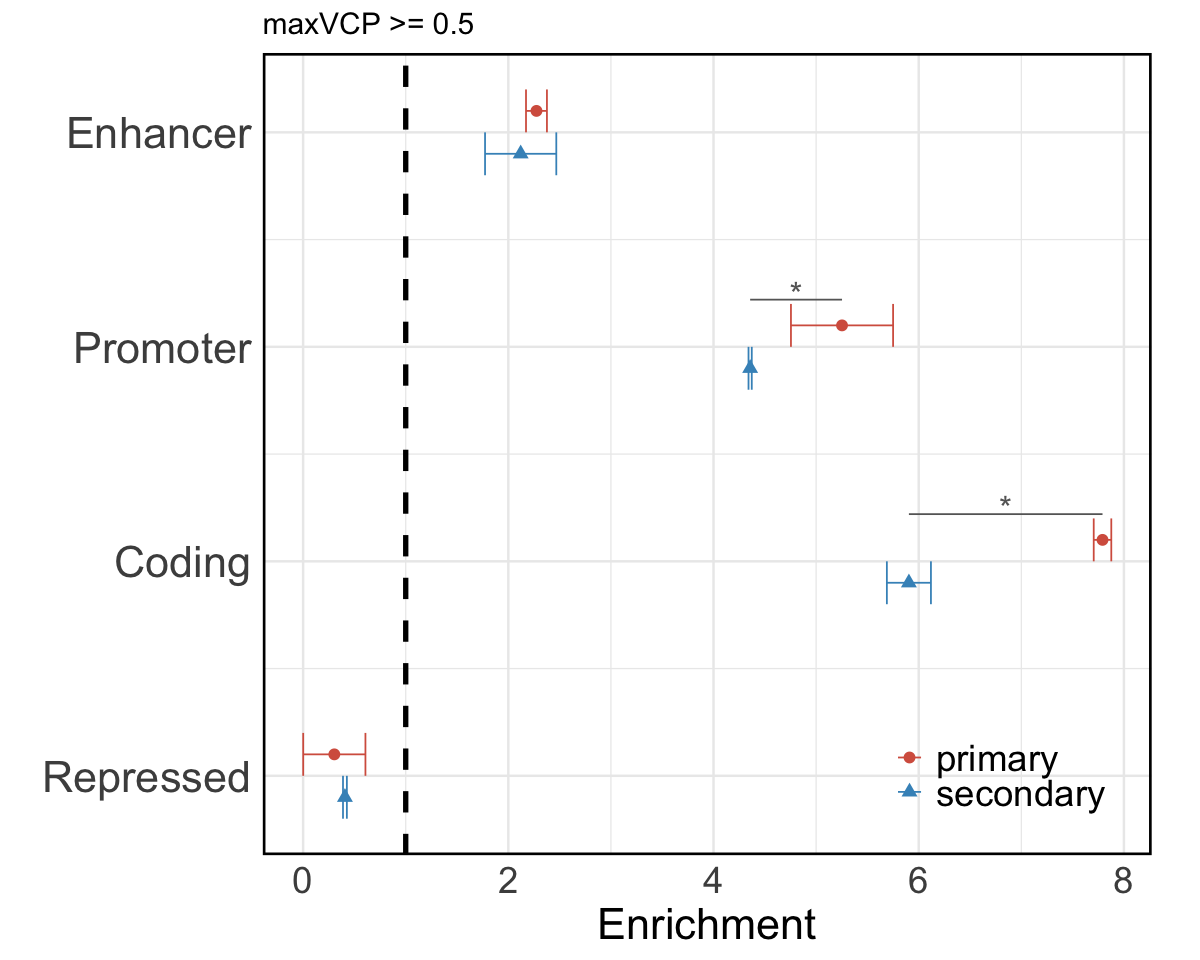

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8)
p2